<a href="https://colab.research.google.com/github/BhuvanaBhupathi/Ai-agent-/blob/main/Datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("spam.csv")

# Rename columns
data.columns = ['label', 'message']

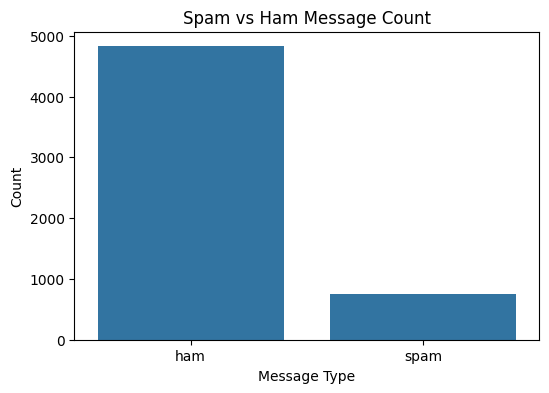

In [ ]:
plt.figure(figsize=(6,4))

sns.countplot(x='label', data=data)

plt.title("Spam vs Ham Message Count")
plt.xlabel("Message Type")
plt.ylabel("Count")

plt.show()

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    return text


In [ ]:
data['message'] = data['message'].apply(clean_text)

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')

X = tfidf.fit_transform(data['message'])
y = data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

nb_pred = nb.predict(X_test)

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

In [ ]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

Naive Bayes Accuracy: 0.9721973094170404
SVM Accuracy: 0.9838565022421525
